In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from glob import glob

In [3]:
data_paths = glob(r'C:\Users\LG\Deep_Learning_Study\Tensorflow\dataset\mnist_png\training/*/*.png')

In [4]:
path = data_paths[0]
path

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\1.png'

In [5]:
data_paths = tf.io.matching_files(r'C:\Users\LG\Deep_Learning_Study\Tensorflow\dataset\mnist_png\training/*/*.png')

In [6]:
path = data_paths[0]
path

<tf.Tensor: id=5, shape=(), dtype=string, numpy=b'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\1.png'>

## Load Image

In [7]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [8]:
image.shape

TensorShape([28, 28, 1])

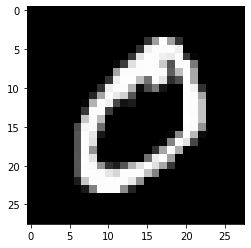

In [9]:
plt.imshow(image[...,0] , 'gray')
plt.show()

## Set Data Generator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
inputs = image[tf.newaxis, ...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [12]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

0.0 254.23982 39.6287


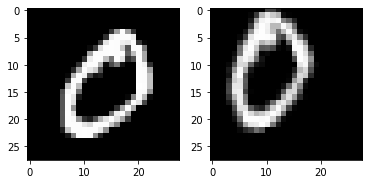

In [15]:
result = next(iter(datagen.flow(inputs)))

print(np.min(result), np.max(result), np.mean(result))

plt.subplot(121)
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Transformation

- width_shift_range  : 0 ~ 1 , 지정 범위에서 랜덤으로 움직임
- height_shift_range  : 0 ~ 1 , 지정 범위에서 랜덤으로 움직임
  
- brightness_range  
- zoom_range  : 0 ~ 1 , 지정 범위에서 랜덤으로 확대
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

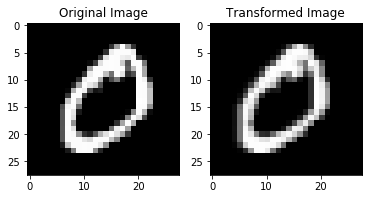

In [30]:
datagen = ImageDataGenerator(
    width_shift_range=0.3
)

result = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

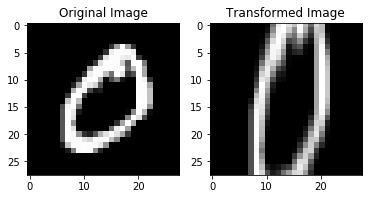

In [29]:
datagen = ImageDataGenerator(
    zoom_range=0.7
)

result = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

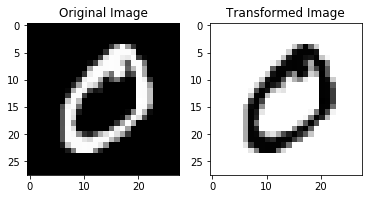

In [92]:
datagen = ImageDataGenerator(
    preprocessing_function = lambda x : x * np.random.randn(1),
    rescale = 1./255.
)

result = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Rescale시 주의사항

##### Train set에만 augmentation을 적용하도록 주의해야함
##### Test set에는 augmentation을 하지 않도록 주의

In [68]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)